In [491]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction/laptops_train.csv
/kaggle/input/laptop-price-prediction/laptops_test.csv


In [492]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [493]:
train=pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_train.csv')
test=pd.read_csv('/kaggle/input/laptop-price-prediction/laptops_test.csv')
df=pd.concat([train.reset_index(drop=True),test.reset_index(drop=True)])
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


# Info

In [494]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 324
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


In [495]:
df.shape

(1302, 13)

In [496]:
df.isnull().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
dtype: int64

In [497]:
df['Operating System Version'].value_counts()

10      1071
7         45
X          8
10 S       8
Name: Operating System Version, dtype: int64

In [498]:
df.duplicated().sum()#only 28 duplicate

28

# EDA and Feature Engineering

In [499]:
df['Operating System Version']=df['Operating System Version'].fillna(df['Operating System Version'].mode()[0])

In [500]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [501]:
for i in ['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen','CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight']:
    
    print(df[i].value_counts(),"\n")

Dell         297
Lenovo       297
HP           274
Asus         157
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Manufacturer, dtype: int64 

XPS 13                                           30
Inspiron 3567                                    29
250 G6                                           21
Legion Y520-15IKBN                               19
Vostro 3568                                      19
Inspiron 5570                                    18
ProBook 450                                      18
Alienware 17                                     15
Inspiron 5567                                    14
Satellite Pro                                    13
EliteBook 840                                    12
Latitude 5580                                    12
ThinkPad X1       

In [502]:
def order(x,num):
    return df[x].value_counts().head(num).index

# Laptop Manufacturer

<Axes: title={'center': 'Popular Manufacturer of Laptops'}, xlabel='count', ylabel='Manufacturer'>

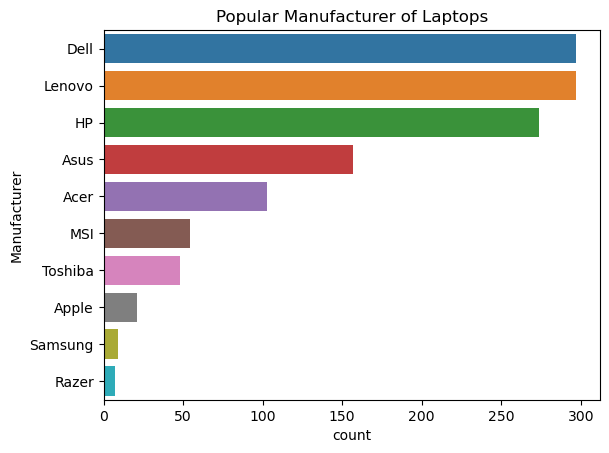

In [503]:
plt.title('Popular Manufacturer of Laptops')
sns.countplot(y=df['Manufacturer'],order=order('Manufacturer',10))
#Dell,Lenovo,HP are the most popular laptop companies

In [504]:
# Considering only top 10 Manufacturers
screen_list=list(df['Manufacturer'].value_counts().index[0:10])
df=df[df['Manufacturer'].isin(screen_list)]

# Model Name

In [505]:
df['Model Name'].nunique()
#as you can see we have 617 names 
#we will not consider it in our analysis becaues model name mostly depends on laptop specification and features
#both of them are already in our dataset

594

In [506]:
df.drop('Model Name',axis=1,inplace=True)

# Category of Laptops

<Axes: title={'center': 'Laptop popularity by category'}, xlabel='count', ylabel='Category'>

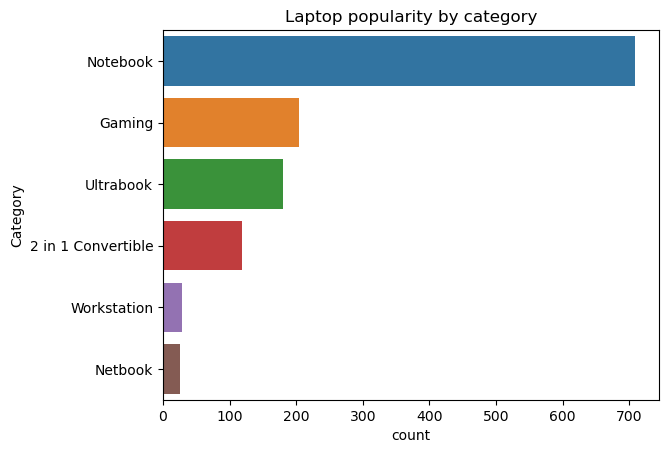

In [507]:
plt.title('Laptop popularity by category')
sns.countplot(y=df['Category'],order=order('Category',10))

# Screen Size

Text(0.5, 1.0, 'Screen Size')

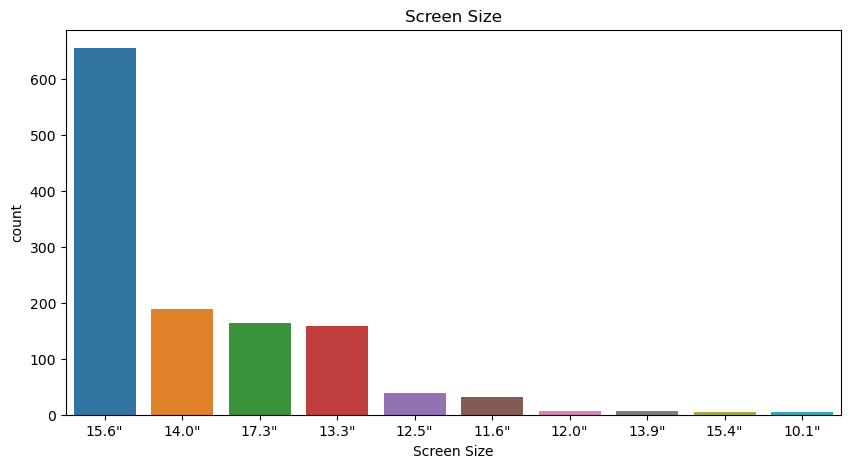

In [508]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Screen Size'],order=order('Screen Size',10))
plt.title('Screen Size')

In [509]:
#we will consider top 5 size only
screen_list=list(df['Screen Size'].value_counts().index[0:6])
df=df[df['Screen Size'].isin(screen_list)]

Text(0.5, 1.0, 'Screen Size')

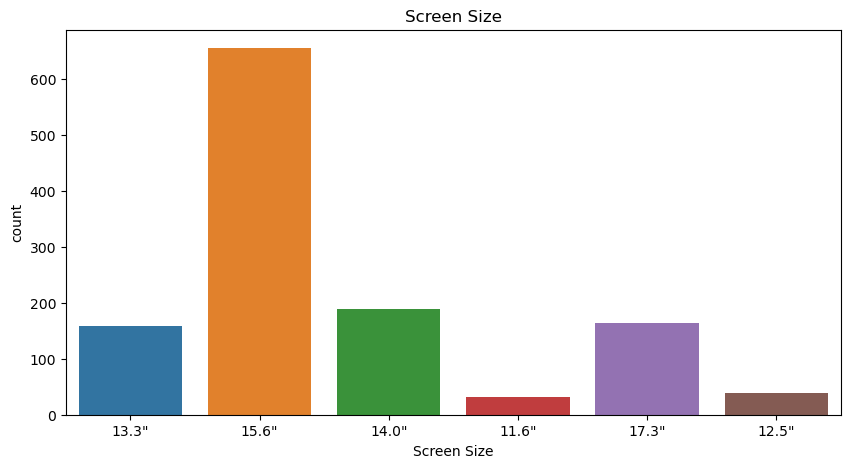

In [510]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Screen Size'])
plt.title('Screen Size')

In [511]:
df['Screen Size']=df['Screen Size'].str.replace('"','').astype('float')

# Screen

In [512]:

df['Touchscreen'] = df['Screen'].str.contains('Touchscreen',case=False).astype('int')

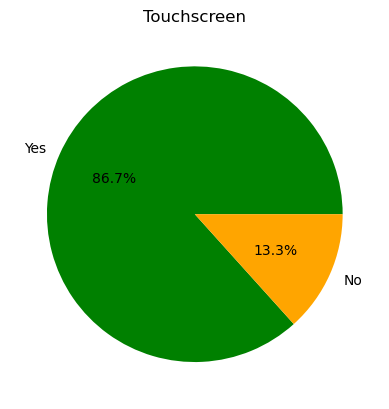

In [513]:
plt.title('Touchscreen')
plt.pie(df['Touchscreen'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [514]:
df['Ips'] = df['Screen'].str.contains('Ips',case=False).astype('int')

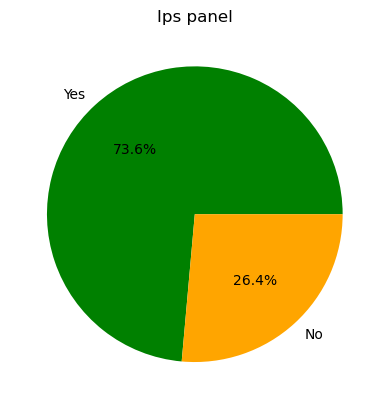

In [515]:
plt.title('Ips panel')
plt.pie(df['Ips'].value_counts(),labels=['Yes','No'],autopct='%.1f%%',colors=['Green','Orange'])
plt.show()

In [516]:
#'\d'-Number ,'+'-one or more ,'x'-means x, '\d+'-one or more digits
#(r'(\d+)x\d+')=select one or more digits followed by x and then one or more digits
df['xres'] = df['Screen'].str.extract(r'(\d+)x\d+').astype('int')
df['yres'] = df['Screen'].str.extract(r'\d+x(\d+)').astype('int')
df.drop('Screen',axis=1,inplace=True)

In [517]:
df['PPI']=(((df['xres']**2+df['yres']**2)**0.5)/df['Screen Size'])

In [518]:
df.drop(['xres','yres'],axis=1,inplace=True)

# Cpu

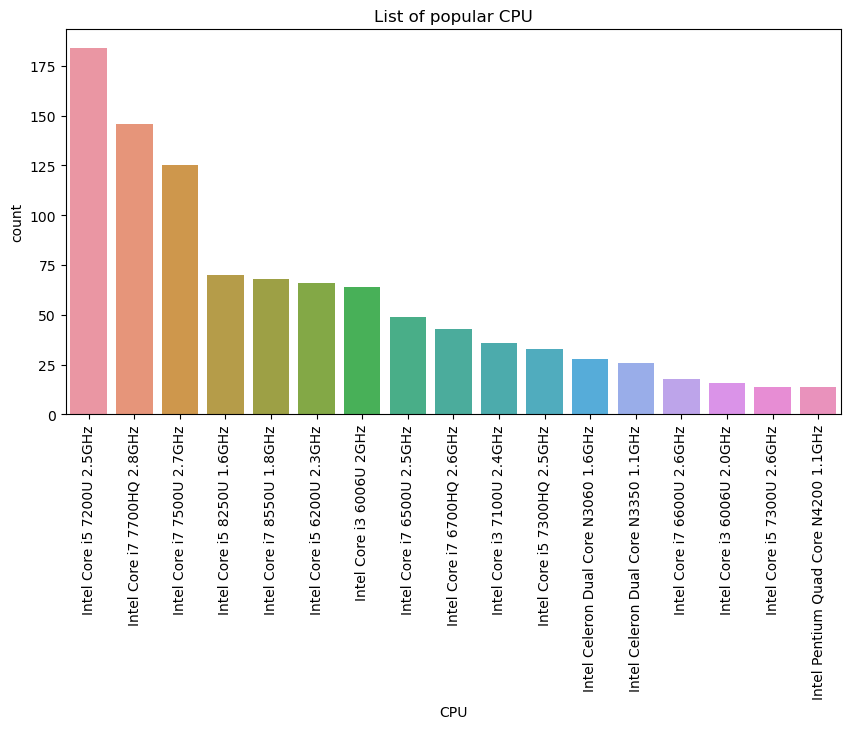

In [519]:
# CPU
plt.figure(figsize=(10,5))
sns.countplot(x=df['CPU'],order=order('CPU',17))
plt.title('List of popular CPU')
plt.xticks(rotation=90)
plt.show()
#top 17 processors are from intel

In [520]:
df['CPU'].value_counts().head(10)

Intel Core i5 7200U 2.5GHz     184
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     125
Intel Core i5 8250U 1.6GHz      70
Intel Core i7 8550U 1.8GHz      68
Intel Core i5 6200U 2.3GHz      66
Intel Core i3 6006U 2GHz        64
Intel Core i7 6500U 2.5GHz      49
Intel Core i7 6700HQ 2.6GHz     43
Intel Core i3 7100U 2.4GHz      36
Name: CPU, dtype: int64

In [521]:
df['Pro_Name']=df['CPU'].apply([lambda x:' '.join(x.split()[0:3])])
df['Pro_Name'].head()

0         Intel Core i5
1         Intel Core i5
2         Intel Core i5
4         Intel Core i5
5    AMD A9-Series 9420
Name: Pro_Name, dtype: object

In [522]:
def extractPro(x):
    if x=='Intel Core i5' or x=='Intel Core i7' or x=='Intel Core i3':
        return x
    else:
        return 'Others'
    
df['CPU']=df['Pro_Name'].apply(extractPro)
df.drop('Pro_Name',axis=1,inplace=True)

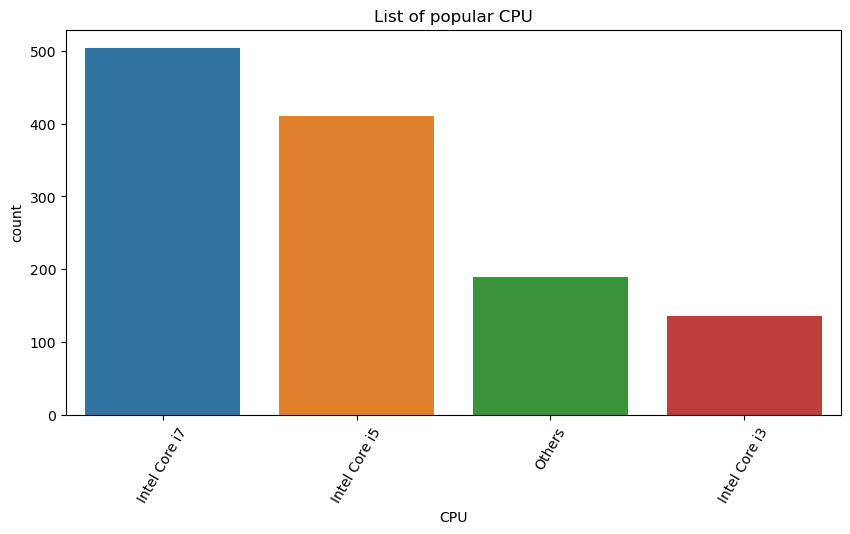

In [523]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['CPU'],order=order('CPU',15))
plt.title('List of popular CPU')
plt.xticks(rotation=60)
plt.show()

# Ram

<Axes: xlabel='RAM', ylabel='count'>

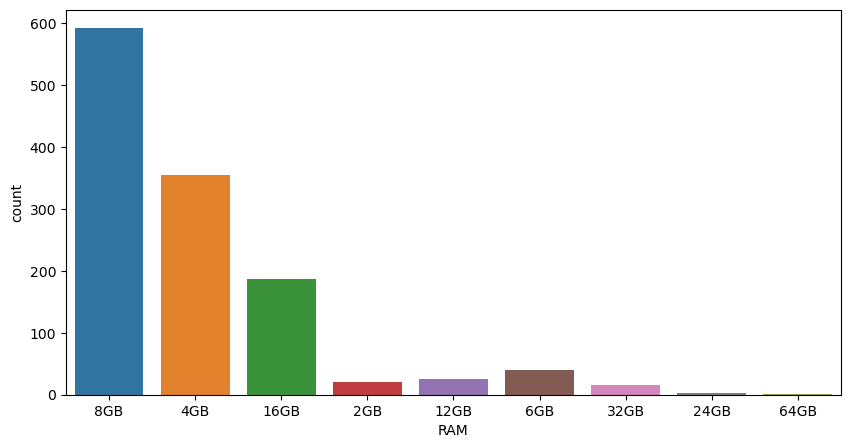

In [524]:

plt.figure(figsize=(10,5))
sns.countplot(x=df['RAM'])

In [525]:
df['RAM']=df['RAM'].str.replace('GB','')
df['RAM'] = df['RAM'].astype('int')

In [526]:
df.head()

,Manufacturer,Category,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48,0,1,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,10,1.34kg,7993374.48,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00,0,0,141.211998
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20,0,1,226.983005
5,Acer,Notebook,15.6,Others,4,500GB HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00,0,0,100.454670


# Storage

In [527]:
df[' Storage'].value_counts()

256GB SSD                        392
1TB HDD                          222
500GB HDD                        131
512GB SSD                        106
128GB SSD +  1TB HDD              94
128GB SSD                         73
256GB SSD +  1TB HDD              73
32GB Flash Storage                30
2TB HDD                           16
1TB SSD                           14
512GB SSD +  1TB HDD              13
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
64GB Flash Storage                 8
16GB Flash Storage                 7
256GB Flash Storage                5
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
32GB SSD                           2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
128GB HDD                          1
512GB SSD +  1TB Hybrid            1
5

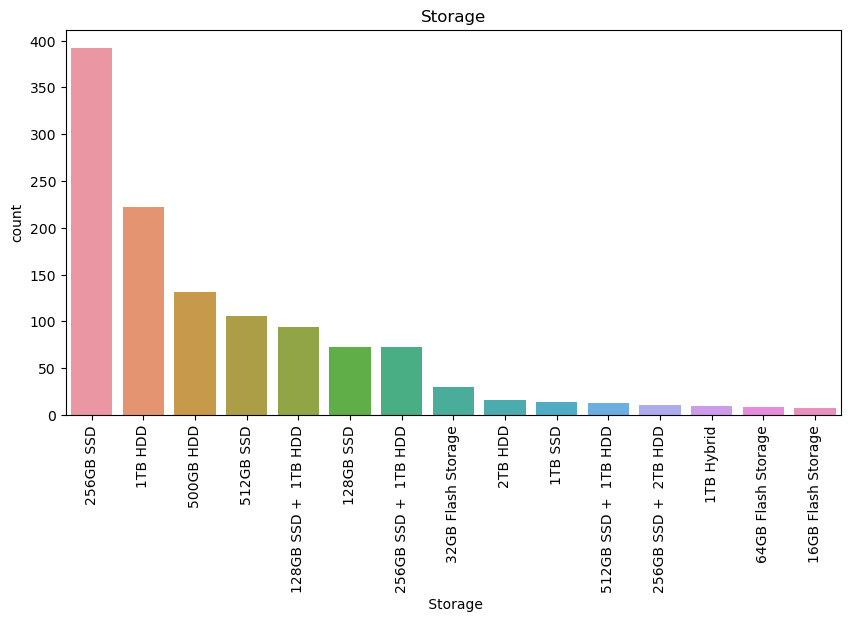

In [528]:
# Storage
plt.figure(figsize=(10,5))
sns.countplot(x=df[' Storage'],order=order(' Storage',15))
plt.title('Storage')
plt.xticks(rotation=90)
plt.show()

In [529]:

top=df[' Storage'].value_counts().head(12).index
df=df[df[' Storage'].isin(top)]
df[' Storage']=df[' Storage'].str.replace('GB','')
df[' Storage']=df[' Storage'].str.replace('TB','000')
first = df[" Storage"].str.split("+", n = 1, expand = True)

df['part1']=first[0]
df['part2']=first[1]#we have null values here
# print(df[['part1','part2']])

df['part1']=df['part1'].str.strip()
df['part2'].fillna('0',inplace=True)

In [530]:
df["Storage1_SSD"] = df["part1"].apply(lambda x: 1 if "SSD" in x else 0)
df["Storage1_HDD"] = df["part1"].apply(lambda x: 1 if "HDD" in x else 0)
df["Storage1_Flash_Storage"] = df["part1"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["Storage2_SSD"] = df["part2"].apply(lambda x: 1 if "SSD" in x else 0)
df["Storage2_HDD"] = df["part2"].apply(lambda x: 1 if "HDD" in x else 0)
df["Storage2_Flash_Storage"] = df["part2"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [531]:
df['part1']=df['part1'].str.replace(r'\D','').astype(int)
df['part2'] = df['part2'].str.replace(r'\D','').astype(int)
df['part1'].dtype

dtype('int64')

In [532]:
df["SSD"]=(df["part1"]*df["Storage1_SSD"]+df["part2"]*df["Storage2_SSD"])
df["HDD"]=(df["part1"]*df["Storage1_HDD"]+df["part2"]*df["Storage2_HDD"])
df["Flash_Storage"]=(df["part1"]*df["Storage1_Flash_Storage"]+df["part2"]*df["Storage2_Flash_Storage"])

df.drop(columns=['part1', 'part2','Storage1_SSD','Storage1_HDD', 'Storage1_Flash_Storage', 'Storage2_SSD', 'Storage2_HDD', 'Storage2_Flash_Storage'],axis=1,inplace=True)
df.head()

,Manufacturer,Category,Screen Size,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5,8,128 SSD,Intel Iris Plus Graphics 640,macOS,10,1.37kg,11912523.48,0,1,226.983005,128,0,0
2,HP,Notebook,15.6,Intel Core i5,8,256 SSD,Intel HD Graphics 620,No OS,10,1.86kg,5112900.00,0,0,141.211998,256,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,256 SSD,Intel Iris Plus Graphics 650,macOS,10,1.37kg,16037611.20,0,1,226.983005,256,0,0
5,Acer,Notebook,15.6,Others,4,500 HDD,AMD Radeon R5,Windows,10,2.1kg,3556800.00,0,0,100.454670,0,500,0
8,Asus,Ultrabook,14.0,Intel Core i7,16,512 SSD,Nvidia GeForce MX150,Windows,10,1.3kg,13293540.00,0,0,157.350512,512,0,0


In [533]:
df.drop(' Storage',axis=1,inplace=True)

# GPU

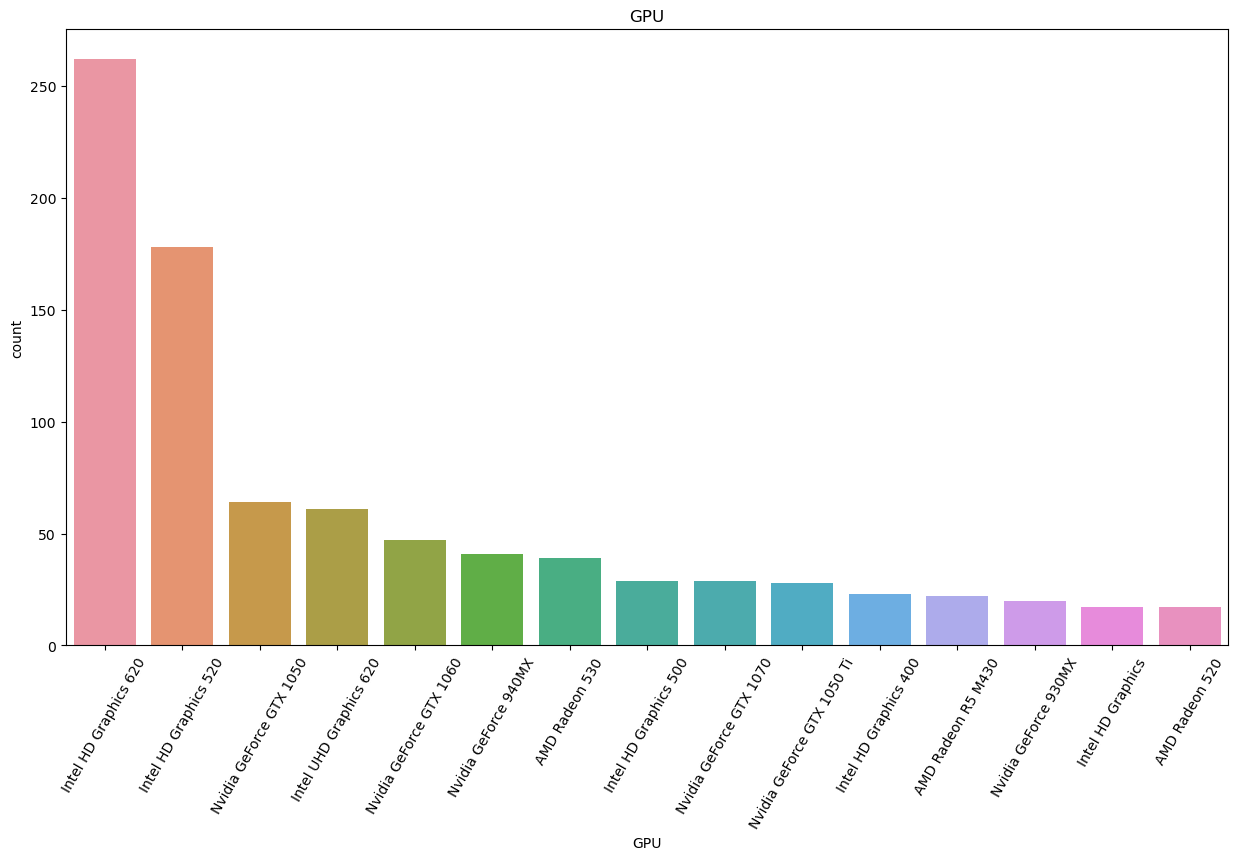

In [534]:
plt.figure(figsize=(15,8))
sns.countplot(x=df['GPU'],order=order('GPU',15))
plt.title('GPU')
plt.xticks(rotation=60)
plt.show()

In [535]:
n=df['GPU'].str.split(' ',n=1,expand=True)
df['GPU']=n[0]
df['GPU'].value_counts()

Intel     627
Nvidia    381
AMD       166
Name: GPU, dtype: int64

In [536]:
df.head()

,Manufacturer,Category,Screen Size,CPU,RAM,GPU,Operating System,Operating System Version,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,10,1.37kg,11912523.48,0,1,226.983005,128,0,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,10,1.86kg,5112900.00,0,0,141.211998,256,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,10,1.37kg,16037611.20,0,1,226.983005,256,0,0
5,Acer,Notebook,15.6,Others,4,AMD,Windows,10,2.1kg,3556800.00,0,0,100.454670,0,500,0
8,Asus,Ultrabook,14.0,Intel Core i7,16,Nvidia,Windows,10,1.3kg,13293540.00,0,0,157.350512,512,0,0


# Operating System

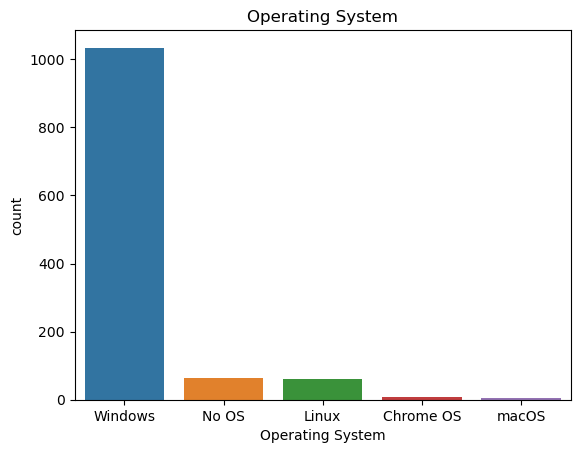

In [537]:
sns.countplot(x=df['Operating System'],order=order('Operating System',10))
plt.title('Operating System')
plt.show()

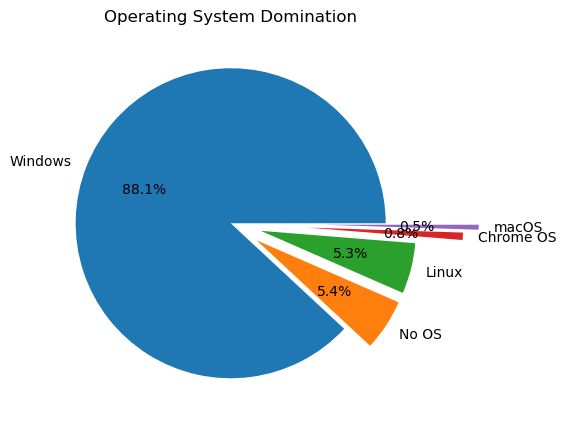

In [538]:
plt.figure(figsize=(5,9))
plt.pie(df['Operating System'].value_counts().head(5),autopct='%0.1f%%',labels=df['Operating System'].value_counts().head(5).index,explode=[0, 0.2, 0.2, .5,.6])
plt.title('Operating System Domination')
plt.show()

# Operating System Version

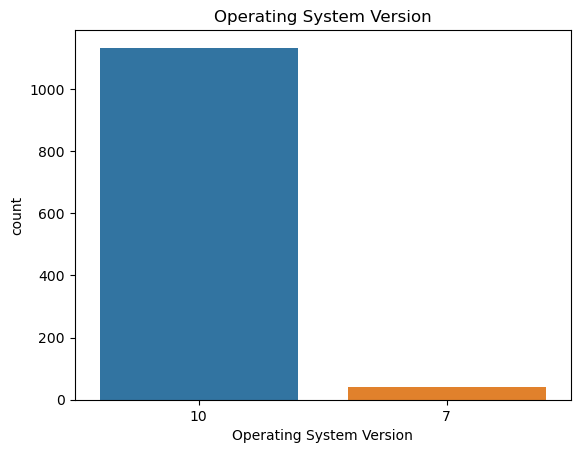

In [539]:
sns.countplot(x=df['Operating System Version'],order=order('Operating System Version',10))
plt.title('Operating System Version')
plt.show()

In [540]:
#we will not consider Operating System Version as a parameter because most of the laptops are coming with os pre installed 
#As you can see market is dominated by windows os and windows 10
df.drop('Operating System Version',axis=1,inplace=True)

# Weight

In [541]:
df['Weight'].value_counts().head(10)

2.2kg     118
2.1kg      57
2.4kg      44
2.3kg      38
2.5kg      36
2kg        35
2.8kg      28
1.86kg     25
2.18kg     23
1.2kg      21
Name: Weight, dtype: int64

In [542]:
df['Weight']=df['Weight'].str.extract(r'(\d+\.?\d*)').astype('float')

In [543]:
df.head()

,Manufacturer,Category,Screen Size,CPU,RAM,GPU,Operating System,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,11912523.48,0,1,226.983005,128,0,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,5112900.00,0,0,141.211998,256,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,16037611.20,0,1,226.983005,256,0,0
5,Acer,Notebook,15.6,Others,4,AMD,Windows,2.10,3556800.00,0,0,100.454670,0,500,0
8,Asus,Ultrabook,14.0,Intel Core i7,16,Nvidia,Windows,1.30,13293540.00,0,0,157.350512,512,0,0


# Final EDA

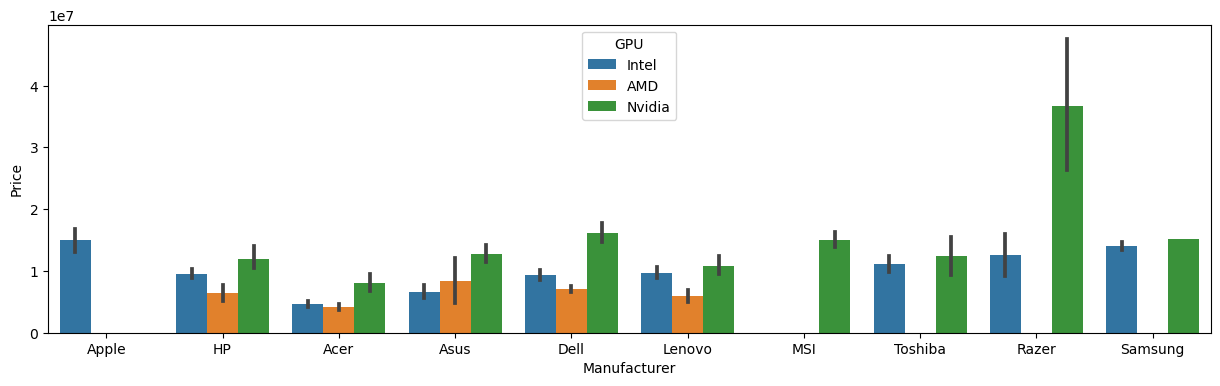

In [544]:
plt.figure(figsize=(15,4))
sns.barplot(x='Manufacturer',y='Price',data=df,hue='GPU')
plt.show()

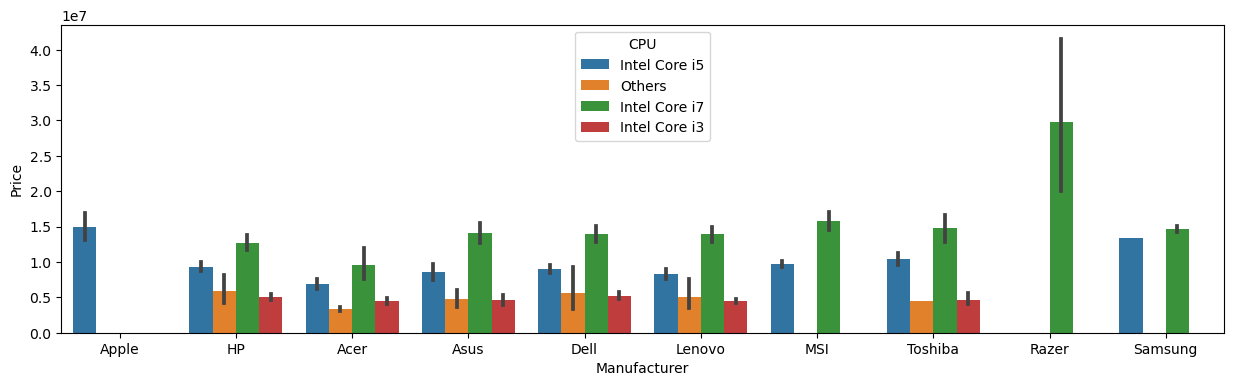

In [545]:
plt.figure(figsize=(15,4))
sns.barplot(x='Manufacturer',y='Price',data=df,hue='CPU')
plt.show()

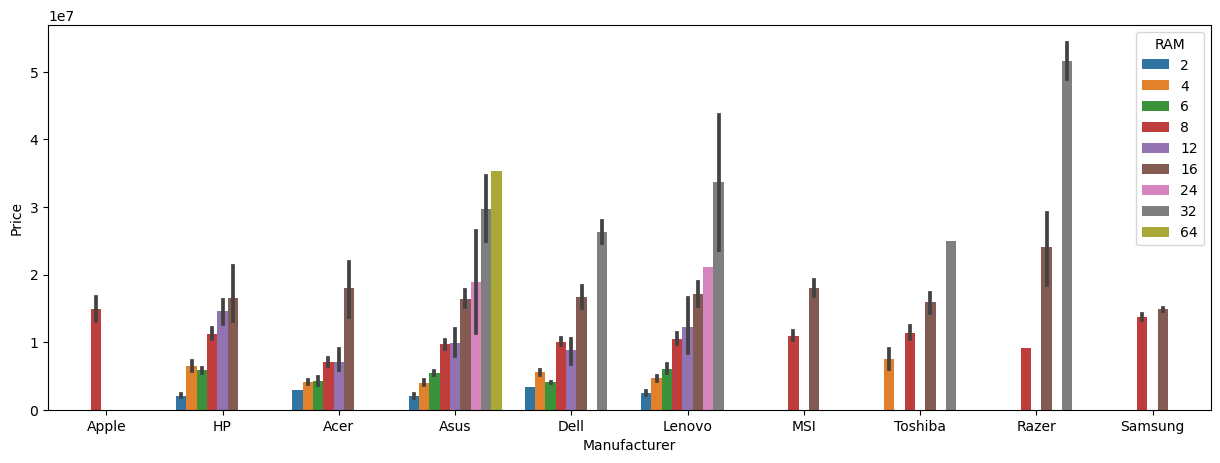

In [546]:
plt.figure(figsize=(15,5))
sns.barplot(x='Manufacturer',y='Price',data=df,hue='RAM')
plt.show()

### Razer offers most of its laprops with top specs (i7,Nvedia,16-32GB Ram)
### The Razer offerings are significantly more expensive than others with similar specs
### AMD GPU's are not popular as Nvedia
### Asus is the only company that offers a 64GB ram option

<Axes: xlabel='Weight', ylabel='Count'>

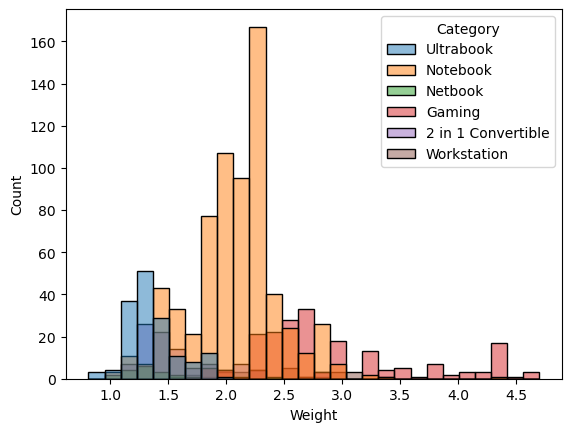

In [547]:
sns.histplot(x='Weight',hue='Category',data=df)
#Laptops for gaming tend to be heavier

<Axes: xlabel='Price', ylabel='Count'>

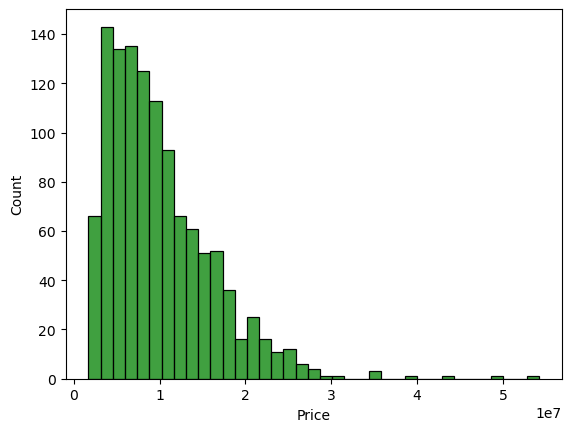

In [548]:
sns.histplot(x='Price',data=df,color='Green')

<Axes: xlabel='Price', ylabel='Count'>

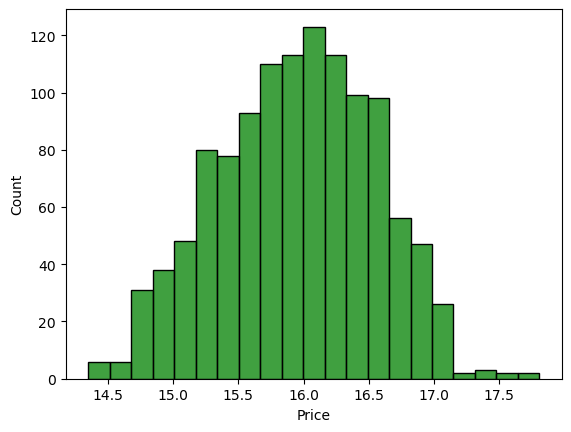

In [549]:
sns.histplot(np.log(df['Price']),color='Green')

# Correlation

<Axes: >

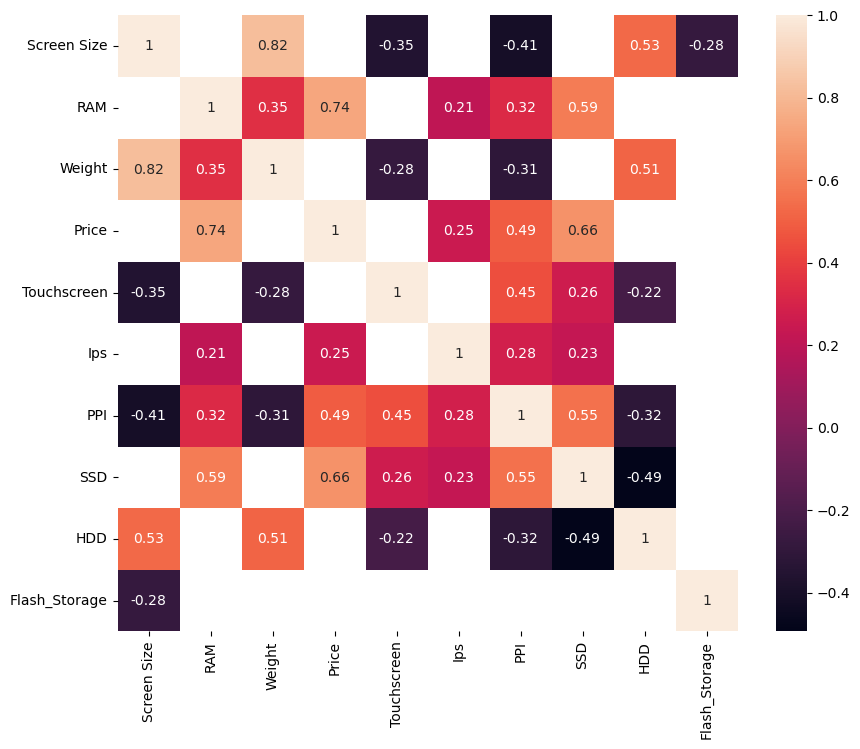

In [550]:
c=df.corr()
d=c[(c>0.2) | (c<-0.2)]
plt.figure(figsize=(10,8))
sns.heatmap(d,annot=True)

In [551]:

df.corr()['Price'].sort_values(ascending=False)

Price            1.000000
RAM              0.736530
SSD              0.662398
PPI              0.488471
Ips              0.248400
Touchscreen      0.194829
Weight           0.188879
Screen Size      0.018851
HDD             -0.132965
Flash_Storage   -0.191727
Name: Price, dtype: float64

In [552]:
df.head()

,Manufacturer,Category,Screen Size,CPU,RAM,GPU,Operating System,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,11912523.48,0,1,226.983005,128,0,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,5112900.00,0,0,141.211998,256,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,16037611.20,0,1,226.983005,256,0,0
5,Acer,Notebook,15.6,Others,4,AMD,Windows,2.10,3556800.00,0,0,100.454670,0,500,0
8,Asus,Ultrabook,14.0,Intel Core i7,16,Nvidia,Windows,1.30,13293540.00,0,0,157.350512,512,0,0


# OneHotEncoder

In [553]:
obj=df.select_dtypes(include=['object'])
obj.head()

,Manufacturer,Category,CPU,GPU,Operating System
0,Apple,Ultrabook,Intel Core i5,Intel,macOS
2,HP,Notebook,Intel Core i5,Intel,No OS
4,Apple,Ultrabook,Intel Core i5,Intel,macOS
5,Acer,Notebook,Others,AMD,Windows
8,Asus,Ultrabook,Intel Core i7,Nvidia,Windows


In [554]:
df.head()

,Manufacturer,Category,Screen Size,CPU,RAM,GPU,Operating System,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage
0,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,11912523.48,0,1,226.983005,128,0,0
2,HP,Notebook,15.6,Intel Core i5,8,Intel,No OS,1.86,5112900.00,0,0,141.211998,256,0,0
4,Apple,Ultrabook,13.3,Intel Core i5,8,Intel,macOS,1.37,16037611.20,0,1,226.983005,256,0,0
5,Acer,Notebook,15.6,Others,4,AMD,Windows,2.10,3556800.00,0,0,100.454670,0,500,0
8,Asus,Ultrabook,14.0,Intel Core i7,16,Nvidia,Windows,1.30,13293540.00,0,0,157.350512,512,0,0


In [555]:
df.columns

Index(['Manufacturer', 'Category', 'Screen Size', 'CPU', 'RAM', 'GPU',
       'Operating System', 'Weight', 'Price', 'Touchscreen', 'Ips', 'PPI',
       'SSD', 'HDD', 'Flash_Storage'],
      dtype='object')

In [556]:
df.drop(columns=['Manufacturer','Operating System'],axis=1,inplace=True)
obj=pd.get_dummies(obj[['Manufacturer','Operating System']])
df=pd.concat([df,obj],axis=1)
df.head()

,Category,Screen Size,CPU,RAM,GPU,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage,Manufacturer_Acer,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Operating System_Chrome OS,Operating System_Linux,Operating System_No OS,Operating System_Windows,Operating System_macOS
0,Ultrabook,13.3,Intel Core i5,8,Intel,1.37,11912523.48,0,1,226.983005,128,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Notebook,15.6,Intel Core i5,8,Intel,1.86,5112900.00,0,0,141.211998,256,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,Ultrabook,13.3,Intel Core i5,8,Intel,1.37,16037611.20,0,1,226.983005,256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Notebook,15.6,Others,4,AMD,2.10,3556800.00,0,0,100.454670,0,500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,Ultrabook,14.0,Intel Core i7,16,Nvidia,1.30,13293540.00,0,0,157.350512,512,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


# LabelEncoder

In [557]:
from sklearn.preprocessing import LabelEncoder

In [558]:
lr=LabelEncoder()
df['Category'] = lr.fit_transform(df['Category'])
df['CPU'] = lr.fit_transform(df['CPU'])
df['GPU'] = lr.fit_transform(df['GPU'])

# Scaling

In [559]:
# df.columns

In [560]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# col=['Screen Size','RAM', 'Weight', 'xres','yres', 'SSD', 'HDD', 'Hybrid', 'Flash_Storage']
# scaled=sc.fit_transform(df[col])
# scaled_df=pd.DataFrame(scaled,columns=col)
# df.drop(col,axis=1,inplace=True)
# df=pd.concat([scaled_df.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
# df.head()

In [561]:
df.head()

,Category,Screen Size,CPU,RAM,GPU,Weight,Price,Touchscreen,Ips,PPI,SSD,HDD,Flash_Storage,Manufacturer_Acer,Manufacturer_Apple,Manufacturer_Asus,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Operating System_Chrome OS,Operating System_Linux,Operating System_No OS,Operating System_Windows,Operating System_macOS
0,4,13.3,1,8,1,1.37,11912523.48,0,1,226.983005,128,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,15.6,1,8,1,1.86,5112900.00,0,0,141.211998,256,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,4,13.3,1,8,1,1.37,16037611.20,0,1,226.983005,256,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
5,3,15.6,3,4,0,2.10,3556800.00,0,0,100.454670,0,500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,4,14.0,2,16,2,1.30,13293540.00,0,0,157.350512,512,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [562]:
from sklearn.model_selection import train_test_split
x=df.drop('Price',axis=1)
y=np.log(df['Price']) #accuracy improved after using log
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

# Model Building

In [563]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [564]:
models = {
    "LinearRegression":LinearRegression(),
    "RandomForest":RandomForestRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "xg":XGBRegressor(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Ada':AdaBoostRegressor(),
    'SVR':SVR(),
    'KNNR':KNeighborsRegressor()
}
for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)  
    print("Model: " , name)
    print("------------------------------")
    print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
    print(r2_score(y_test,p))
    print(".............................|\n")

Model:  LinearRegression
------------------------------
RMSE: 0.526480483308586
0.7227390790552866
.............................|

Model:  RandomForest
------------------------------
RMSE: 0.43153677458520634
0.8588440478476417
.............................|

Model:  DecisionTree
------------------------------
RMSE: 0.4692178558418587
0.7804126822110271
.............................|

Model:  xg
------------------------------
RMSE: 0.3986927067537011
0.8978184111155473
.............................|

Model:  Lasso
------------------------------
RMSE: 0.5974971952744675
0.5297009188951658
.............................|

Model:  Ridge
------------------------------
RMSE: 0.5257499922406759
0.7229654650182413
.............................|

Model:  Ada
------------------------------
RMSE: 0.5148118035622529
0.7702237036127932
.............................|

Model:  SVR
------------------------------
RMSE: 0.552666865069611
0.6473811137474955
.............................|

Model:  KNNR
--

# Hyperparameter tuning 

In [565]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
param_grid = {
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [30,50,100,200]
}


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print("------------------------------------\n")

p=grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print(r2_score(y_test,p))

{'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
0.8370879441345332
------------------------------------

RMSE: 0.46620331146538224
0.8300583089031672


In [566]:
model = XGBRegressor()
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000]
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
print("------------------------------------\n")


p=grid_search.predict(x_test)
print("RMSE:",np.sqrt(mean_absolute_error(y_test,p)))
print(r2_score(y_test,p))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best Score: 0.8950623400944494
------------------------------------

RMSE: 0.4001831125392378
0.8979088480484648
